In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu

# Parâmetros da distribuição
n_samples = 5000  # Número de amostras por classe
means = [np.array([0,0,0,0,0,0,0,0]), np.array([4,0,0,0,0,0,0,0]),
         np.array([0,0,0,4,0,0,0,0]), np.array([0,0,0,0,0,0,0,4])]
covariance = np.eye(8)  # Matriz de covariância unitária

# Gerar dados
data = []
labels = []
for i, mean in enumerate(means):
    class_samples = np.random.multivariate_normal(mean, covariance, n_samples)
    data.append(class_samples)
    labels += [i] * n_samples
data = np.vstack(data)
labels = np.array(labels)

# Normalização dos dados
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Construir o autoencoder
input_dim = 8
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinar o autoencoder
autoencoder.fit(data_normalized, data_normalized, epochs=100, batch_size=64, shuffle=True, verbose=0)

# Transformar os dados para 2D usando o encoder
data_2d = encoder.predict(data_normalized)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


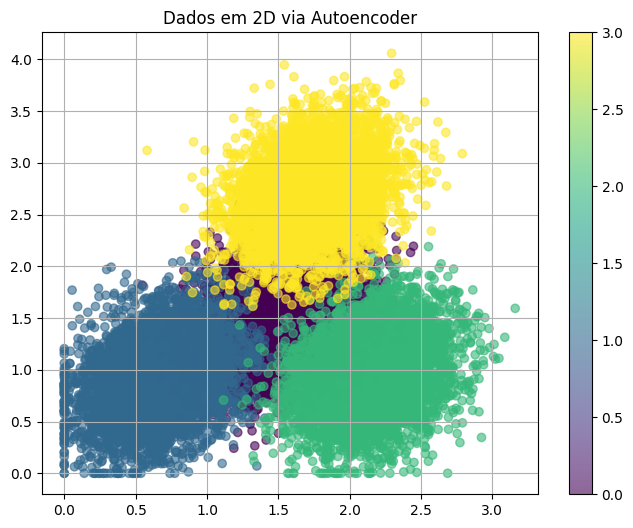

In [2]:
# Visualizar os dados transformados
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Dados em 2D via Autoencoder')
plt.grid(True)
plt.show()